# Opgave 1


## 1.1.1

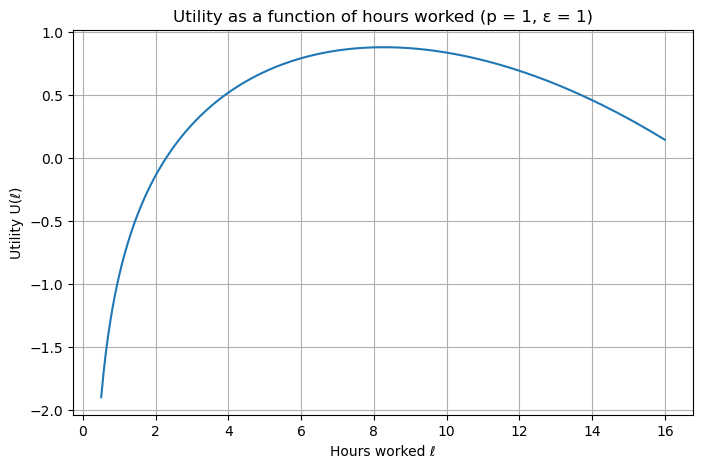

In [13]:
from Worker import WorkerClass
import numpy as np
import matplotlib.pyplot as plt

# create worker with default parameters
worker = WorkerClass()
par= worker.par

# make sure epsilon is 1 for this part
worker.par.epsilon = 1.0

# productivity
p = 1.0

# hours domain (ℓ from 0.5 to 16)
ell_min = 0.5
ell_max = worker.par.ell_max  # this is 16.0 in your setup
ell_grid = np.linspace(ell_min, ell_max, 500)

# post-tax income c(ℓ)
c_grid = worker.post_tax_income(p, ell_grid)

# utility U(ℓ) = log(c) - ν ℓ^(1+ε)/(1+ε)
U_grid = np.full_like(ell_grid, np.nan, dtype=float)

# only compute utility where consumption is positive
mask = c_grid > 0
U_grid[mask] = worker.utility(c_grid[mask], ell_grid[mask])


plt.figure(figsize=(8, 5))
plt.plot(ell_grid, U_grid)
plt.xlabel("Hours worked ℓ")
plt.ylabel("Utility U(ℓ)")
plt.title("Utility as a function of hours worked (p = 1, ε = 1)")
plt.grid(True)
plt.show()

## 1.1.2

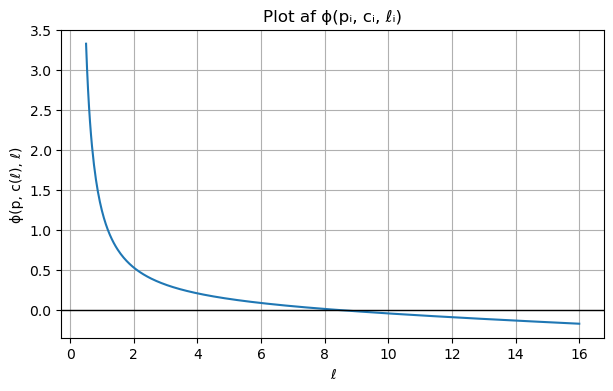

In [7]:
p = 1.0  # valgt p_i
worker = WorkerClass()

# interval ℓ_i ∈ [0.5, ell_max]
ells = np.linspace(0.5, worker.par.ell_max, 500)

# compute phi( p, c(ell), ell )
phi_values = worker.FOC(p, ells)

# plot
plt.figure(figsize=(7,4))
plt.plot(ells, phi_values)
plt.axhline(0, color='k', lw=1)
plt.xlabel("ℓ")
plt.ylabel("ϕ(p, c(ℓ), ℓ)")
plt.title("Plot af ϕ(pᵢ, cᵢ, ℓᵢ)")
plt.grid(True)
plt.show()

## 1.1.3

In [29]:

# find optimum using optimizer (minimize_scalar)
opt = worker.optimal_choice(1)

# print result
print(f'Optimal choice for p={1}:')
print(f"Optimal Labor Supply (optimizer) = {opt.ell:.4f}")
print(f"Optimal Consumption (c)           = {opt.c:.4f}")
print(f"Utility at optimum (U)            = {opt.U:.4f}")

Optimal choice for p=1:
Optimal Labor Supply (optimizer) = 8.2656
Optimal Consumption (c)           = 4.0328
Utility at optimum (U)            = 0.8821


## 1.1.4

In [30]:
resultat = worker.optimal_choice_FOC(1)

# 3. Vis resultatet
print(f"Optimal choice for p=1:")
print(f"  Labor Supply (l*): {resultat.ell:.4f}")
print(f"  Consumption (c):   {resultat.c:.4f}")
print(f"  Utility (U):       {resultat.U:.4f}")

Optimal choice for p=1:
  Labor Supply (l*): 8.2656
  Consumption (c):   4.0328
  Utility (U):       0.8821


## 1.1.5

In [37]:
print(f"Result from Numerical Optimizer: l = {res_opt.ell:.8f}")
print(f"Result from Root-Finder:       l = {res_root.ell:.8f}")
print(f"Difference:                      {abs(res_opt.ell - res_root.ell):.10f}")

Result from Numerical Optimizer: l = 8.26557814
Result from Root-Finder:       l = 8.26557816
Difference:                      0.0000000180


## 1.1.6

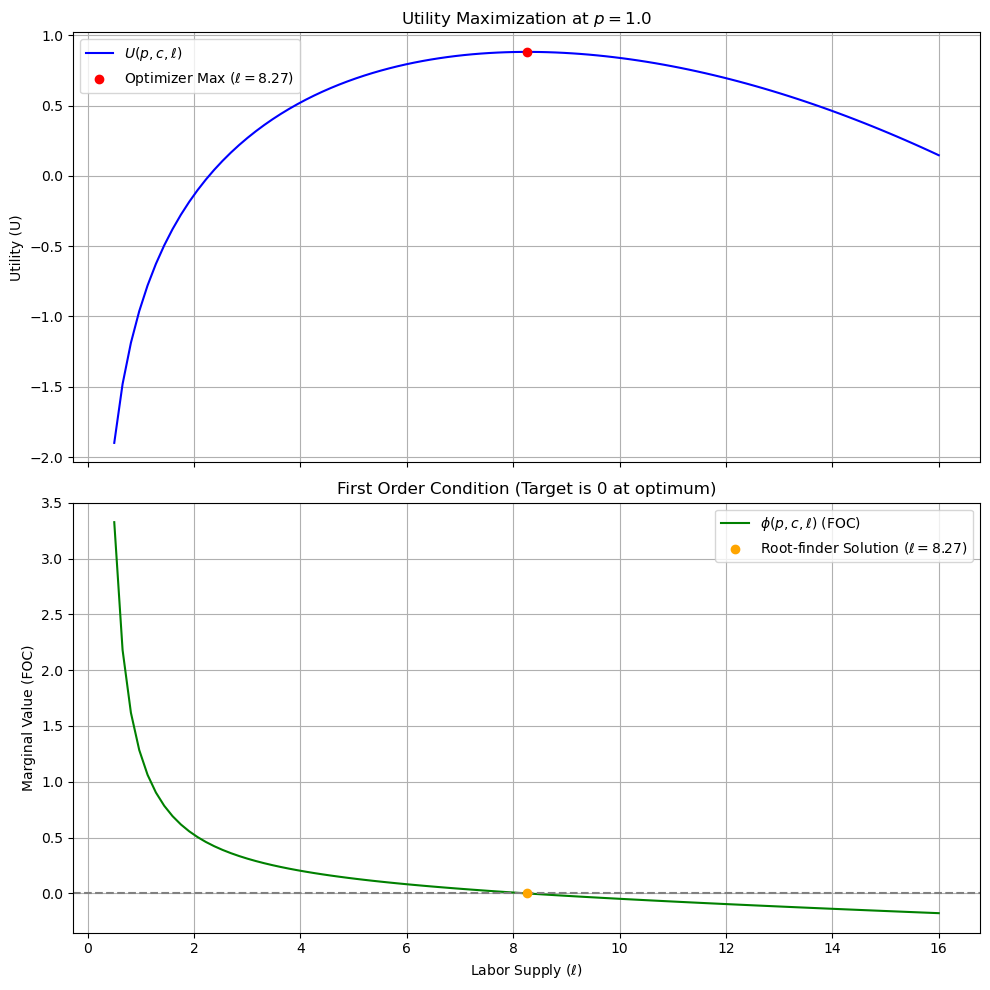

Result from Numerical Optimizer: l = 8.26557814
Result from Root-Finder:       l = 8.26557816
Difference:                      0.0000000180


In [38]:
# Ensure epsilon is set as desired (default is 1.0 in your class)
par.epsilon = 1.0

# 2. Generate data for plots
# We create a range of values for l from 0.5 to 16
N = 100
l_grid = np.linspace(0.5, 16.0, N)

# Calculate Utility (U) and FOC for all these points
u_values = []
foc_values = []

for l in l_grid:
    c = worker.post_tax_income(p, l)
    u_values.append(worker.utility(c, l))
    foc_values.append(worker.FOC(p, l))

# 3. Find solutions using both methods
# Method A: Numerical Optimization (Maximize Utility)
res_opt = worker.optimal_choice(p)

# Method B: Root-Finding (Solve FOC = 0)
res_root = worker.optimal_choice_FOC(p)

# 4. Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))

# --- Plot 1: Utility Function ---
ax1.plot(l_grid, u_values, label='$U(p, c, \ell)$', color='blue')
# Mark the solution from the numerical optimizer
ax1.scatter(res_opt.ell, res_opt.U, color='red', zorder=5, label=f'Optimizer Max ($\ell={res_opt.ell:.2f}$)')
ax1.set_ylabel('Utility (U)')
ax1.set_title(f'Utility Maximization at $p={p}$')
ax1.legend()
ax1.grid(True)

# --- Plot 2: FOC (First Order Condition) ---
ax2.plot(l_grid, foc_values, label=r'$\phi(p, c, \ell)$ (FOC)', color='green')
# Draw a line at 0
ax2.axhline(0, color='gray', linestyle='--')
# Mark the solution from the root-finder (We mark it on the 0-line)
ax2.scatter(res_root.ell, 0, color='orange', zorder=5, label=f'Root-finder Solution ($\ell={res_root.ell:.2f}$)')
ax2.set_xlabel('Labor Supply ($\ell$)')
ax2.set_ylabel('Marginal Value (FOC)')
ax2.set_title('First Order Condition (Target is 0 at optimum)')
ax2.legend()
ax2.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

# 5. Comparison (print to console)
print(f"Result from Numerical Optimizer: l = {res_opt.ell:.8f}")
print(f"Result from Root-Finder:       l = {res_root.ell:.8f}")
print(f"Difference:                      {abs(res_opt.ell - res_root.ell):.10f}")

## Epsilon = 0.75

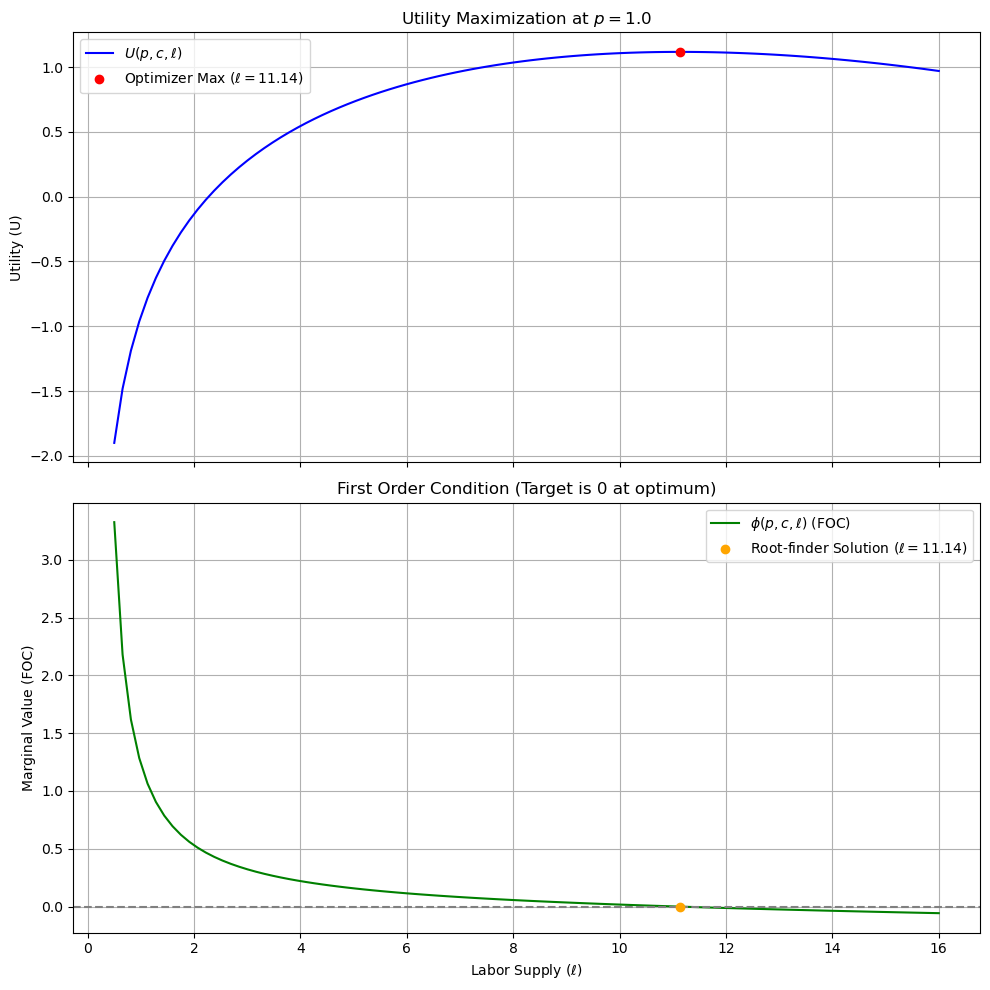

Result from Numerical Optimizer: l = 11.13604845
Result from Root-Finder:       l = 11.13604818
Difference:                      0.0000002678


In [39]:
# Ensure epsilon is set as desired (default is 1.0 in your class)
par.epsilon = 0.75

# 2. Generate data for plots
# We create a range of values for l from 0.5 to 16
N = 100
l_grid = np.linspace(0.5, 16.0, N)

# Calculate Utility (U) and FOC for all these points
u_values = []
foc_values = []

for l in l_grid:
    c = worker.post_tax_income(p, l)
    u_values.append(worker.utility(c, l))
    foc_values.append(worker.FOC(p, l))

# 3. Find solutions using both methods
# Method A: Numerical Optimization (Maximize Utility)
res_opt = worker.optimal_choice(p)

# Method B: Root-Finding (Solve FOC = 0)
res_root = worker.optimal_choice_FOC(p)

# 4. Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))

# --- Plot 1: Utility Function ---
ax1.plot(l_grid, u_values, label='$U(p, c, \ell)$', color='blue')
# Mark the solution from the numerical optimizer
ax1.scatter(res_opt.ell, res_opt.U, color='red', zorder=5, label=f'Optimizer Max ($\ell={res_opt.ell:.2f}$)')
ax1.set_ylabel('Utility (U)')
ax1.set_title(f'Utility Maximization at $p={p}$')
ax1.legend()
ax1.grid(True)

# --- Plot 2: FOC (First Order Condition) ---
ax2.plot(l_grid, foc_values, label=r'$\phi(p, c, \ell)$ (FOC)', color='green')
# Draw a line at 0
ax2.axhline(0, color='gray', linestyle='--')
# Mark the solution from the root-finder (We mark it on the 0-line)
ax2.scatter(res_root.ell, 0, color='orange', zorder=5, label=f'Root-finder Solution ($\ell={res_root.ell:.2f}$)')
ax2.set_xlabel('Labor Supply ($\ell$)')
ax2.set_ylabel('Marginal Value (FOC)')
ax2.set_title('First Order Condition (Target is 0 at optimum)')
ax2.legend()
ax2.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

# 5. Comparison (print to console)
print(f"Result from Numerical Optimizer: l = {res_opt.ell:.8f}")
print(f"Result from Root-Finder:       l = {res_root.ell:.8f}")
print(f"Difference:                      {abs(res_opt.ell - res_root.ell):.10f}")

## Epsilon = 0.5

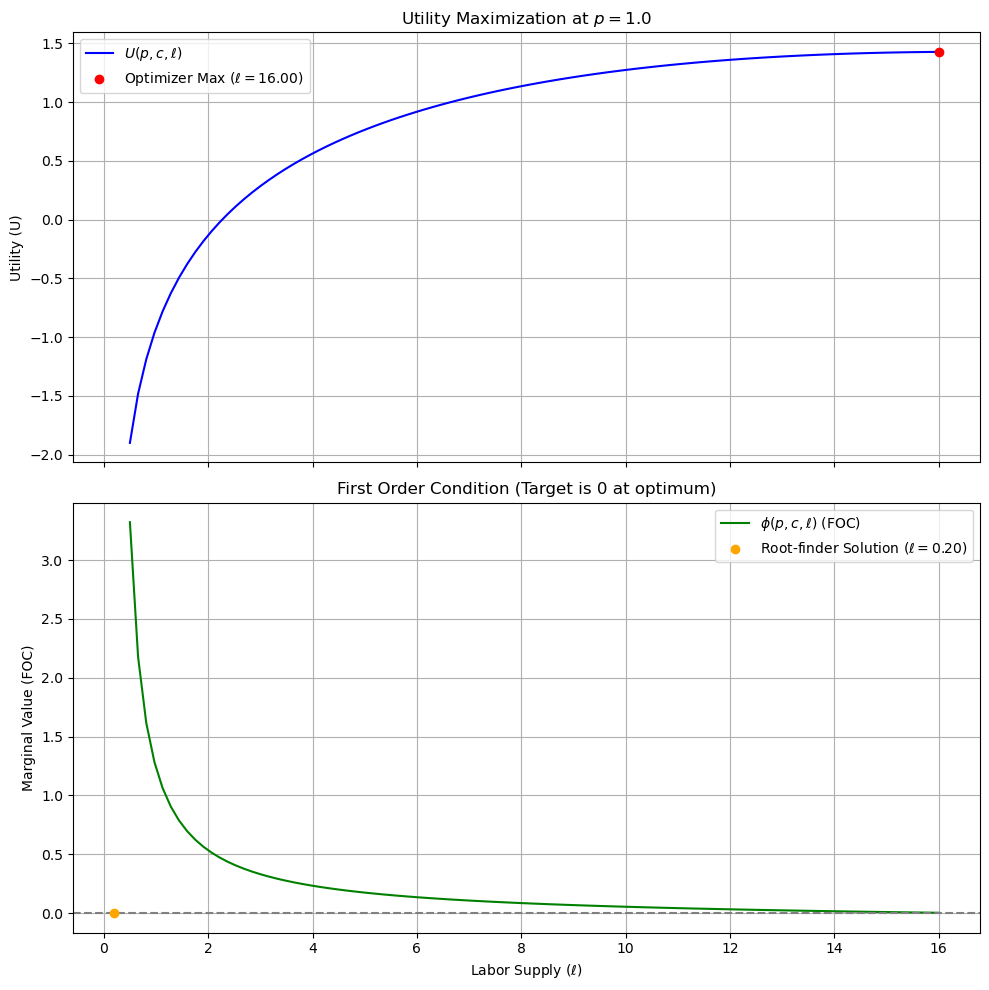

Result from Numerical Optimizer: l = 15.99999607
Result from Root-Finder:       l = 0.20000001
Difference:                      15.7999960585


In [40]:
# Ensure epsilon is set as desired (default is 1.0 in your class)
par.epsilon = 0.5

# 2. Generate data for plots
# We create a range of values for l from 0.5 to 16
N = 100
l_grid = np.linspace(0.5, 16.0, N)

# Calculate Utility (U) and FOC for all these points
u_values = []
foc_values = []

for l in l_grid:
    c = worker.post_tax_income(p, l)
    u_values.append(worker.utility(c, l))
    foc_values.append(worker.FOC(p, l))

# 3. Find solutions using both methods
# Method A: Numerical Optimization (Maximize Utility)
res_opt = worker.optimal_choice(p)

# Method B: Root-Finding (Solve FOC = 0)
res_root = worker.optimal_choice_FOC(p)

# 4. Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 10))

# --- Plot 1: Utility Function ---
ax1.plot(l_grid, u_values, label='$U(p, c, \ell)$', color='blue')
# Mark the solution from the numerical optimizer
ax1.scatter(res_opt.ell, res_opt.U, color='red', zorder=5, label=f'Optimizer Max ($\ell={res_opt.ell:.2f}$)')
ax1.set_ylabel('Utility (U)')
ax1.set_title(f'Utility Maximization at $p={p}$')
ax1.legend()
ax1.grid(True)

# --- Plot 2: FOC (First Order Condition) ---
ax2.plot(l_grid, foc_values, label=r'$\phi(p, c, \ell)$ (FOC)', color='green')
# Draw a line at 0
ax2.axhline(0, color='gray', linestyle='--')
# Mark the solution from the root-finder (We mark it on the 0-line)
ax2.scatter(res_root.ell, 0, color='orange', zorder=5, label=f'Root-finder Solution ($\ell={res_root.ell:.2f}$)')
ax2.set_xlabel('Labor Supply ($\ell$)')
ax2.set_ylabel('Marginal Value (FOC)')
ax2.set_title('First Order Condition (Target is 0 at optimum)')
ax2.legend()
ax2.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

# 5. Comparison (print to console)
print(f"Result from Numerical Optimizer: l = {res_opt.ell:.8f}")
print(f"Result from Root-Finder:       l = {res_root.ell:.8f}")
print(f"Difference:                      {abs(res_opt.ell - res_root.ell):.10f}")

## 1.2.1

Beregnet optimale l for 100 forskellige p-værdier.
Eksempel: Ved p=0.50 er l* = 8.37
Eksempel: Ved p=3.00 er l* = 8.20


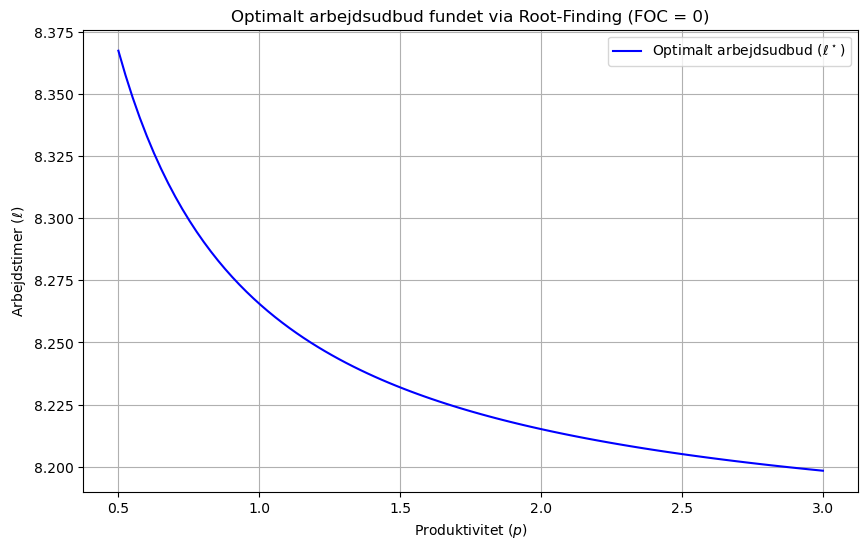

In [14]:
# 1. Opret lister til at gemme resultaterne
l_star_values = []
c_values = []
p_values = par.ps  # Dette er listen af produktiviteter fra 0.5 til 3.0

# 2. Loop over hver produktivitet p
for p in p_values:
    # Kald metoden der bruger root-finding (optimal_choice_FOC)
    opt = worker.optimal_choice_FOC(p)
    
    # Gem resultatet
    l_star_values.append(opt.ell)
    c_values.append(opt.c)

# 3. Udskriv eller plot resultatet
print(f"Beregnet optimale l for {len(p_values)} forskellige p-værdier.")
print(f"Eksempel: Ved p={p_values[0]:.2f} er l* = {l_star_values[0]:.2f}")
print(f"Eksempel: Ved p={p_values[-1]:.2f} er l* = {l_star_values[-1]:.2f}")

# Plot resultatet (hvis du kører i en notebook)
plt.figure(figsize=(10,6))
plt.plot(p_values, l_star_values, label='Optimalt arbejdsudbud ($\ell^\star$)', color='blue')
plt.xlabel('Produktivitet ($p$)')
plt.ylabel('Arbejdstimer ($\ell$)')
plt.title('Optimalt arbejdsudbud fundet via Root-Finding (FOC = 0)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from Worker import WorkerClass

model= WorkerClass()
model.setup_worker()

c = model.post_tax_income(p=1,ell=0.5)

model.utility(c=c,ell=0.5)
model.optimal_choice(p=1)







NameError: name 'tax' is not defined